In [1]:
import numpy as np
import utils 

# Caricamento dei datasets row

In [2]:
#Carico i datasets
audio_files_target = utils.load_dataset('Dataset/Target')
audio_files_nonTarget = utils.load_dataset('Dataset/Non-Target')   

# Caricamento dataset in due dataframe, uno per nome, uno per path

In [3]:
df_paths, df_names = utils.create_dataframe_from_files("Dataset")

In [4]:
df_paths, df_names

(                                               FilePath
 0     Dataset\Non-Target\Ambient Noise\0f9867d8-fcf7...
 1     Dataset\Non-Target\Ambient Noise\2b68b3a9-7c0d...
 2     Dataset\Non-Target\Ambient Noise\2f574049-3325...
 3     Dataset\Non-Target\Ambient Noise\30679527-fd7a...
 4     Dataset\Non-Target\Ambient Noise\f9652ad2-39f5...
 ...                                                 ...
 2658  Dataset\Target\Vessel\SanctSound_OC01_03_ship_...
 2659  Dataset\Target\Vessel\SanctSound_OC02_01_ship_...
 2660  Dataset\Target\Vessel\SanctSound_OC03_02_ship_...
 2661  Dataset\Target\Vessel\SanctSound_SB03_09_vesse...
 2662               Dataset\Target\Vessel\ship_small.mp3
 
 [2663 rows x 1 columns],
                                             FileName
 0           0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3
 1           2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3
 2           2f574049-3325-446c-a8ac-2e5b31e9e32f.mp3
 3           30679527-fd7a-4cad-8c7d-cb1bcc07604d.mp3
 4           f9652

# Ricerca ed eliminazione dei duplicati

In [5]:
duplicate_indices = utils.find_duplicates(df_names)
print(duplicate_indices)

{'72021005.wav': [105, 211], '7202100T.wav': [106, 213], '7202100V.wav': [107, 214], '7202100Z.wav': [108, 215], '7702800U.wav': [956, 1563], '7702800V.wav': [957, 1564], '7702800X.wav': [958, 1565], '7702801F.wav': [964, 1566], '7702801M.wav': [967, 1567], '78018002.wav': [110, 216], '78018003.wav': [111, 217], '7801800B.wav': [113, 218], '7801800D.wav': [114, 219], '7801800H.wav': [115, 220], '7801800J.wav': [116, 221], '84016002.wav': [1463, 1575], '8401600B.wav': [1464, 1576], '84021003.wav': [1232, 1579], '91012009.wav': [1000, 1603], '9101200B.wav': [1001, 1604], '9101200K.wav': [1004, 1605], '9101201E.wav': [1009, 1606], '91012022.wav': [1015, 1607], '91012048.wav': [1044, 1608], '91012049.wav': [1045, 1609]}


# Salvataggio del dizionario in un file json

In [6]:
import json

# Convert the dictionary to a JSON string
duplicate_indices_json = json.dumps(duplicate_indices)

# Write the JSON string to a file
with open('Dataset/duplicate_indices.json', 'w') as f:
    f.write(duplicate_indices_json)

# Eliminazione duplicati

In [7]:
# Remove the duplicate rows
df_paths, df_names = utils.remove_rows(df_paths, df_names, 'Dataset/duplicate.txt', 'Dataset/df_paths.csv', 'Dataset/df_names.csv')

In [8]:
df_names, df_paths

(                                            FileName
 0           0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3
 1           2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3
 2           2f574049-3325-446c-a8ac-2e5b31e9e32f.mp3
 3           30679527-fd7a-4cad-8c7d-cb1bcc07604d.mp3
 4           f9652ad2-39f5-41b4-a8e4-89171a864f03.mp3
 ...                                              ...
 2658    SanctSound_OC01_03_ship_20191106T223751Z.wav
 2659    SanctSound_OC02_01_ship_20190419T233040Z.wav
 2660    SanctSound_OC03_02_ship_20200228T080107Z.wav
 2661  SanctSound_SB03_09_vessel_20200415T161235Z.wav
 2662                                  ship_small.mp3
 
 [2636 rows x 1 columns],
                                                FilePath
 0     Dataset\Non-Target\Ambient Noise\0f9867d8-fcf7...
 1     Dataset\Non-Target\Ambient Noise\2b68b3a9-7c0d...
 2     Dataset\Non-Target\Ambient Noise\2f574049-3325...
 3     Dataset\Non-Target\Ambient Noise\30679527-fd7a...
 4     Dataset\Non-Target\Ambient Noise

In [10]:
#TODO: dirgli di aggiornare il file di metadata, ci sono 1973 file su 2638
#TODO: Vedere la frequenza massima di ogni audio,analisi canali e bitrate, e controllare il contenuto di tali frequenze e decidere se continuare ad abbassare il range di frequenze. Cercare di ridurre il più possibile. Secondo benedetto 192Khz.  

# Estrazione delle durate degli audio e plot della distribuzione delle stesse

In [2]:
audio_durations = utils.extract_durations('Dataset/df_paths.csv')

In [3]:
audio_durations

[31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 20.0,
 9.99297052154195,
 8.668526077097505,
 10.29297052154195,
 9.993015873015873,
 19.993015873015874,
 37.24267573696145,
 5.0,
 11.00625850340136,
 3.527995444191344,
 3.527995444191344,
 3.527995444191344,
 1.763986332574032,
 1.763986332574032,
 1.763986332574032,
 3.527995444191344,
 2.646013667425968,
 3.527995444191344,
 1.2227062706270626,
 1.5207920792079208,
 1.2324752475247525,
 1.116831683168317,
 1.1664686468646865,
 1.4574257425742574,
 1.0967656765676568,
 1.7937293729372936,
 1.4621782178217821,
 0.8645544554455445,
 0.9821782178217822,
 1.8723267326732673,
 1.33016501650165,
 1.3526072607260726,
 1.451089108910891,
 58.62316831683168,
 1.9211875,
 1.7978125,
 1.6121875,
 1.665125,
 1.682425,
 1.551,
 1.3395,
 1.4241,
 1.5369,
 1.2408,
 1.5792,
 1.4382,
 1.7907,
 1.692,
 1.2549,
 1.1421,
 1.4946,
 1.3677,
 1.3959,
 1.6074,
 1.5087,
 1.3959,
 1.3113,
 1.4382,
 1.2

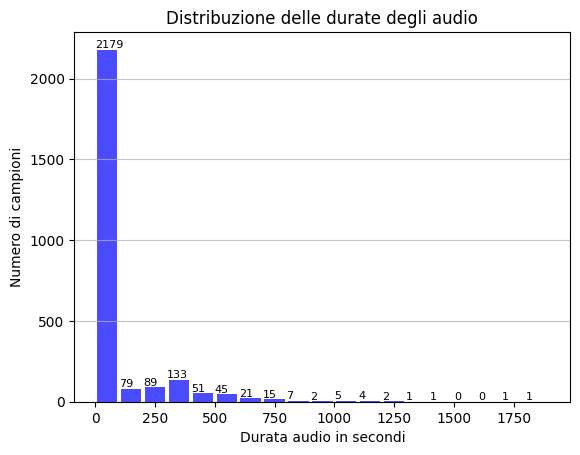

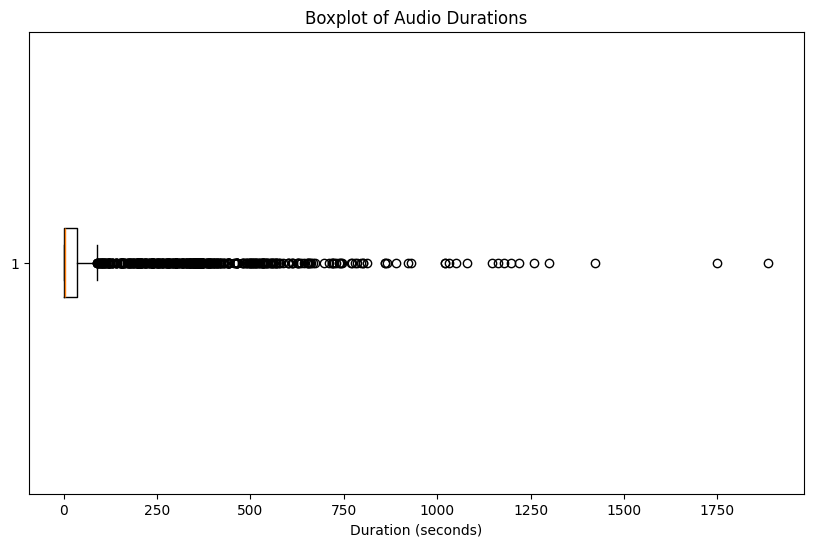

In [25]:
utils.plot_durations(audio_durations)

In [26]:
import pandas as pd

# Converti audio_durations in una serie pandas
audio_durations_series = pd.Series(audio_durations)

# Ottieni il summary
summary = audio_durations_series.describe()

print(summary)

count    2636.000000
mean       75.871738
std       174.695407
min         0.053687
25%         1.417969
50%         3.485131
75%        36.076375
max      1887.000000
dtype: float64


Dopo aver fatto l'analisi delle durate, visto il valore di mediana pari a 3,48 secondi, si può decidere di tagliare gli audio a 3,5 secondi

# Analisi delle frequenze
### Frequenze di campionamento

2000 200000
600 384000


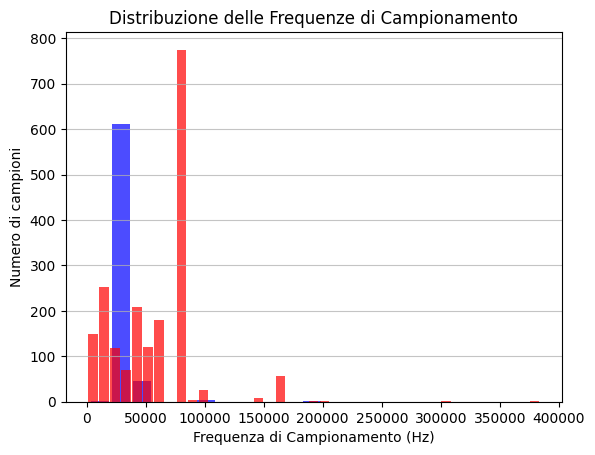

In [7]:
#TODO: analisi per il resembling shannon Nyquist 
#TODO: da modificare --> non prendere i duplicati 
frequenciesTarget,frequenciesNonTarget = utils.get_frequencies('Dataset/df_paths.csv')
    
min = np.min(frequenciesTarget)
max = np.max(frequenciesTarget)

print(min, max)

min = np.min(frequenciesNonTarget)
max = np.max(frequenciesNonTarget)

print(min, max)

utils.plotFrequencies(frequenciesTarget,frequenciesNonTarget)

## Analisi frequenze massime per audio

In [4]:
audio_files = utils.get_audio_files('Dataset/df_paths.csv')

Skipping Dataset\Non-Target\Minke Whale\64103001.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103002.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103003.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103004.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103005.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103006.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103007.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103008.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64103009.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\6410300A.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\6410300B.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64104001.wav because it's too short
Skipping Dataset\Non-Target\Minke Whale\64104002.wav because it's too short
Skipping Dat

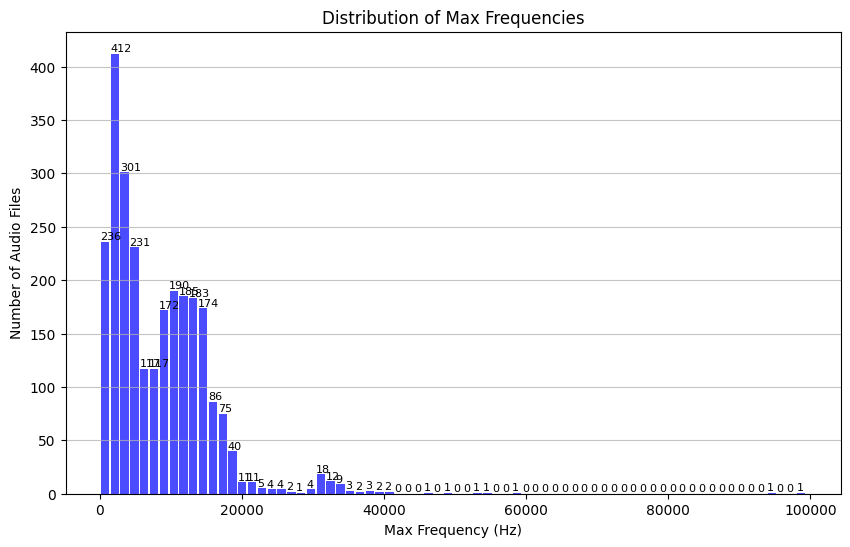

In [6]:
max_frequencies = utils.analyze_max_frequencies(audio_files)
utils.plot_max_frequencies(max_frequencies)

In [27]:
import pandas as pd

# Converti audio_durations in una serie pandas
audio_frequencies_series = pd.Series(max_frequencies)

# Ottieni il summary
summary = audio_frequencies_series.describe()

print(summary)

count     2619.000000
mean      8430.130869
std       7236.783840
min         83.251688
25%       2870.666218
50%       7158.179993
75%      12509.754457
max      99417.572177
dtype: float64


Tenendo conto del teorema di Nyquist, si può decidere di fare resampling a 192KHz (198KHz). Abbiamo deciso di utilizzare il doppio del massimo, come consigliato dal teorema di Nyquist.

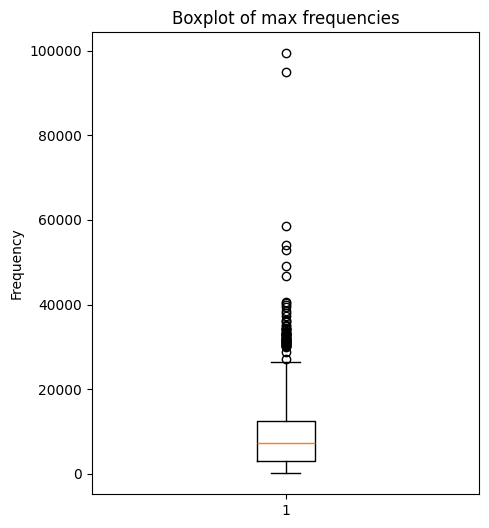

In [16]:
utils.boxplot_max_frequencies(max_frequencies)

# Analisi della distribuzione del numero di Canali Audio

Files with 2 channels:
Dataset/Target/Acoustic Harassment Devices/AHD_Airmar.wav
Dataset/Target/Cargo/Cargo-Ship-at-20-knts.wav
Dataset/Target/Passengership/1cc5583b-fe72-4cb2-b64c-563bd87ad91b.mp3
Dataset/Target/Underwater Communication Signals/HLF-5-Active-Sonar.wav
Dataset/Target/Underwater Communication Signals/M-Sequence-communication-sonar.wav
Dataset/Target/Sonar/LFA-Sonar-Simulation.wav
Dataset/Target/Seismic airguns surveys/airguns.mp3
Dataset/Target/Seismic airguns surveys/Airgun-and-Echosounders.wav
Dataset/Target/Vessel/ship_small.mp3
Dataset/Target/Vessel/rhb_arrival.mp3
Dataset/Target/Vessel/Merchant-Ship-passing-at-1-mile.wav
Dataset/Target/Seafloor fossil fuel processing/SeaFloorProcessing.wav
Dataset/Non-Target/Black Drum/Black-Drum.wav
Dataset/Non-Target/Atlantic croaker/Croaker.wav
Dataset/Non-Target/Bearded Seal/Bearded_Seal.wav
Dataset/Non-Target/Perch/SeaPerch.wav
Dataset/Non-Target/Ringed Seal/Ringed-Seal-2.wav
Dataset/Non-Target/Northern fur seal/Ant-fur-seal-pu

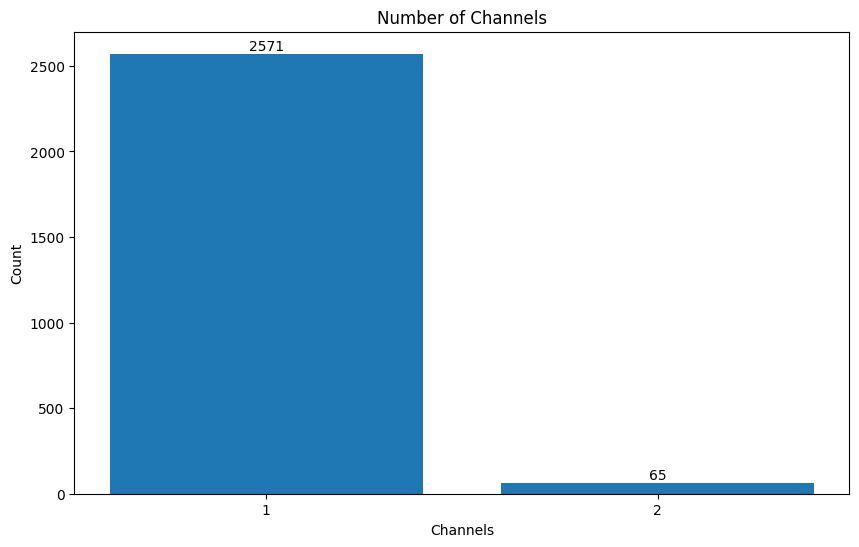

In [17]:
channels = utils.analyze_channels(audio_files)
utils.plot_channels(channels)

Considerando la prevalenza dei canali monocanali si è deciso di convertire tutti i canali a mono

# Analisi dei Bit Depth

Could not process file Dataset\Non-Target\Dwarf Sperm Whale\burst-pulse-DSW_bullfrog-click-train.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\click-trains-DSW_tic-tocs-and-clicks.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\clicks-and-whistles-DSW_Rattelsnake-click-train.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\DSW_whistles-and-rattles.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\multipart-stepping-tonal-DSW_downsweep-rattle.wav
Could not process file Dataset\Non-Target\Dwarf Sperm Whale\xzoom-whistle-2-DSW_whistles-and-slow-click-train.wav
Could not process file Dataset\Non-Target\Fraser_s Dolphin\Lagenodelphis_hosei_FR_clicks-and-wolf-whistle.wav
Could not process file Dataset\Non-Target\Fraser_s Dolphin\Lagenodelphis_hosei_FR_down-sweep.wav
Could not process file Dataset\Non-Target\Fraser_s Dolphin\Lagenodelphis_hosei_FR_up-sweeps.wav
Could not process file Dataset\Non-Target\Fraser_s Dolphin\Lagenodelph

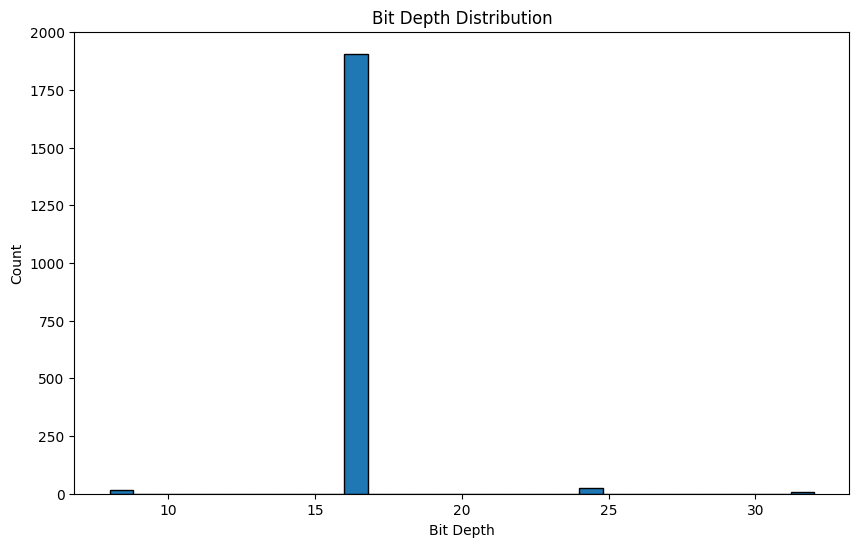

In [14]:
import soundfile as sf
import matplotlib.pyplot as plt

import wave
import matplotlib.pyplot as plt

def analyze_and_plot_bit_depth(audio_files):
    bit_depths = []
    countskipped= 0
    totalChampions = 0
    for file in audio_files:
        if file.lower().endswith('.mp3'):  # Ignora i file .mp3
            continue
        try:
            with wave.open(file, 'rb') as wf:
                bit_depth = wf.getsampwidth() * 8  # Convert sample width to bit depth
                bit_depths.append(bit_depth)
                totalChampions = totalChampions + 1
        except:
            print(f"Could not process file {file}")
            countskipped = countskipped + 1
            continue

    # Crea un plot a barre della distribuzione delle bit depth
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(bit_depths, bins=30, edgecolor='black')
    plt.xlabel('Bit Depth')
    plt.ylabel('Count')
    plt.title('Bit Depth Distribution')

    # Aggiungi il numero di campioni per ogni classe
    for count, bin, patch in zip(counts, bins, patches):
        height = patch.get_height()
        if count>0:
            plt.text(bin, height, str(int(count)), fontsize=12, ha='left')

    plt.show()
    
    #Stampa dei campioni
    print("Totale skippati: ",countskipped)
    print("Totale campioni analizzati: ", totalChampions)


# Utilizzo della funzione
audio_files = utils.get_audio_files('Dataset/df_paths.csv')
analyze_and_plot_bit_depth(audio_files)

Vista la prevalenza del bit depth a 16 bit, si è deciso di convertire tutti i file a 16 bit

# Analisi sulla distribuzione delle classi

In [9]:
import pandas as pd
import os

# Carica il DataFrame da df_paths.csv
# df_paths = pd.read_csv('Dataset/df_paths.csv', header=None, names=['path'])

# Crea una copia del DataFrame originale
df_paths_copy = df_paths.copy()

# Estrai la classe e il target dai percorsi dei file
df_paths_copy['class'] = df_paths_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df_paths_copy['target'] = df_paths_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(os.path.dirname(path))))

# Ora il DataFrame df_paths_copy contiene le nuove colonne 'class' e 'target'

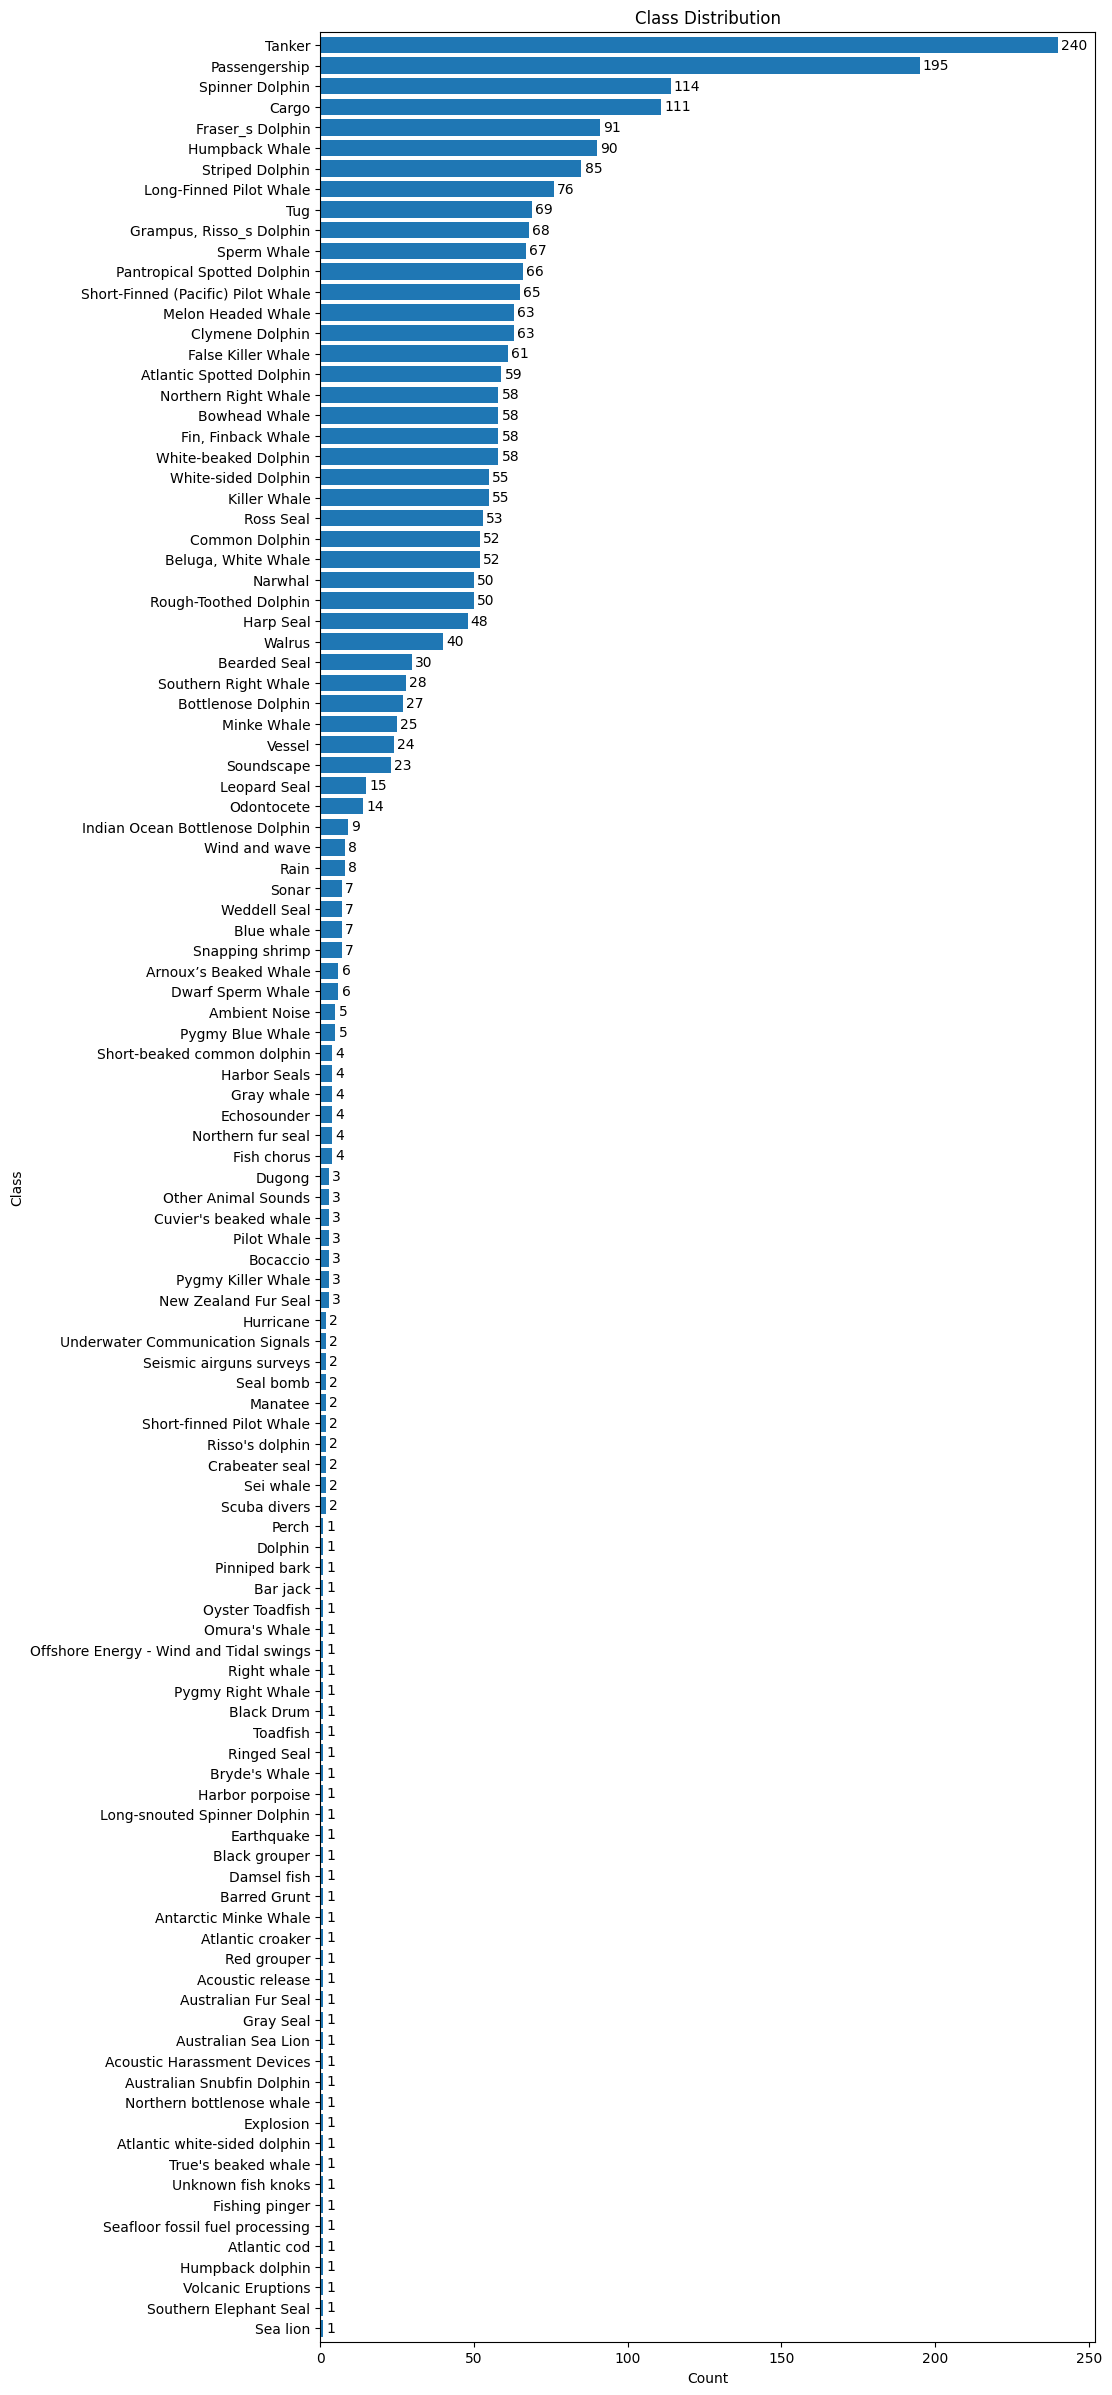

In [10]:
utils.plot_class_distribution_horizontal(df_paths_copy, 'class')

In [ ]:
#utils.plot_class_distribution(df_paths_copy, 'class')